Math 150 Module 3 Group 2D: Ivan Huang, Henry Guo, Porfirio Montoya, Ryan Milstrey, and Aaron Romero

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t
import seaborn as sns
import statsmodels.api as sm
from numpy.random import default_rng
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

<h2>Module 3, Assignment 17</h2>

<h3>Part 1: Read the mario data</h3>

In [2]:
data_file = "mario_file.json"
with open(data_file, 'r') as mario_file:
    data = json.loads(mario_file.read())

print(f"Number of items: {len(data)}")

# Response
popularity = []

# Predictors
likes = []
boos = []
num_comments = []
for item in data:
    i_attempts, i_likes, i_boos, i_comments, i_record, i_upload_time = item["attempts"], item["likes"], item["boos"], item["num_comments"], item["world_record"], item["upload_time"]
    # Discard data with less than 50 in any of these categories
    min_value = 0
    if i_attempts < min_value or i_likes < min_value or i_boos < min_value or i_comments < min_value:
        continue
    weight = .8
    average_time = i_record * weight + i_upload_time * (1-weight)
    popularity.append(i_attempts * average_time)
    likes.append(i_likes)
    boos.append(i_boos)
    num_comments.append(i_comments)

popularity = np.array(popularity)
likes = np.array(likes)
boos = np.array(boos)
num_comments = np.array(num_comments)

Number of items: 20001


<h3>Part 2: Plot Mario Data</h3>

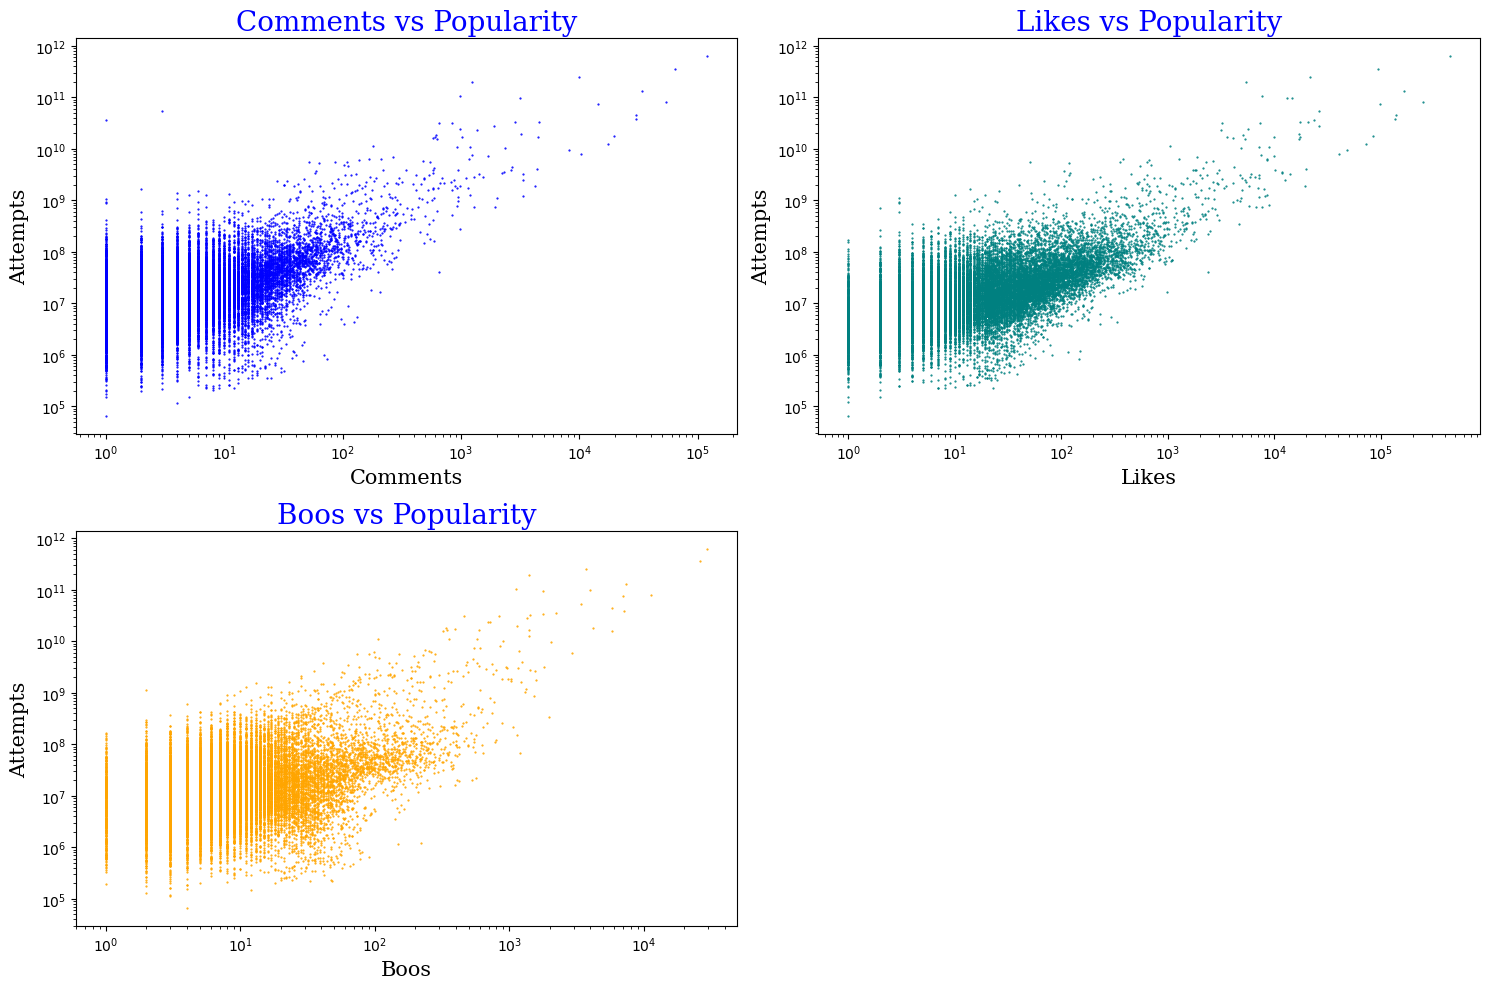

In [3]:
# Set up fonts
font1 = {'family':'serif','color':'black','size':15}
font2 = {'family':'serif','color':'blue','size':20}
font3 = {'family':'serif','color':'black','size':8}
font4 = {'family':'serif','color':'blue','size':15}
dot_size = 0.3

# Create figure for 2D subplots
plt.figure(figsize=(15, 10))

# First subplot: Comments vs Popularity
plt.subplot(2, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.scatter(num_comments, popularity, s=dot_size, color="blue")
plt.xlabel("Comments", fontdict=font1)
plt.ylabel("Attempts", fontdict=font1)
plt.title("Comments vs Popularity", fontdict=font2)

# Second subplot: Likes vs Popularity
plt.subplot(2, 2, 2)
plt.xscale("log")
plt.yscale("log")
plt.scatter(likes, popularity, s=dot_size, color="teal")
plt.xlabel("Likes", fontdict=font1)
plt.ylabel("Attempts", fontdict=font1)
plt.title("Likes vs Popularity", fontdict=font2)

# Third subplot: Boos vs Popularity
plt.subplot(2, 2, 3)
plt.xscale("log")
plt.yscale("log")
plt.scatter(boos, popularity, s=dot_size, color="orange")
plt.xlabel("Boos", fontdict=font1)
plt.ylabel("Attempts", fontdict=font1)
plt.title("Boos vs Popularity", fontdict=font2)

plt.tight_layout()
plt.show()

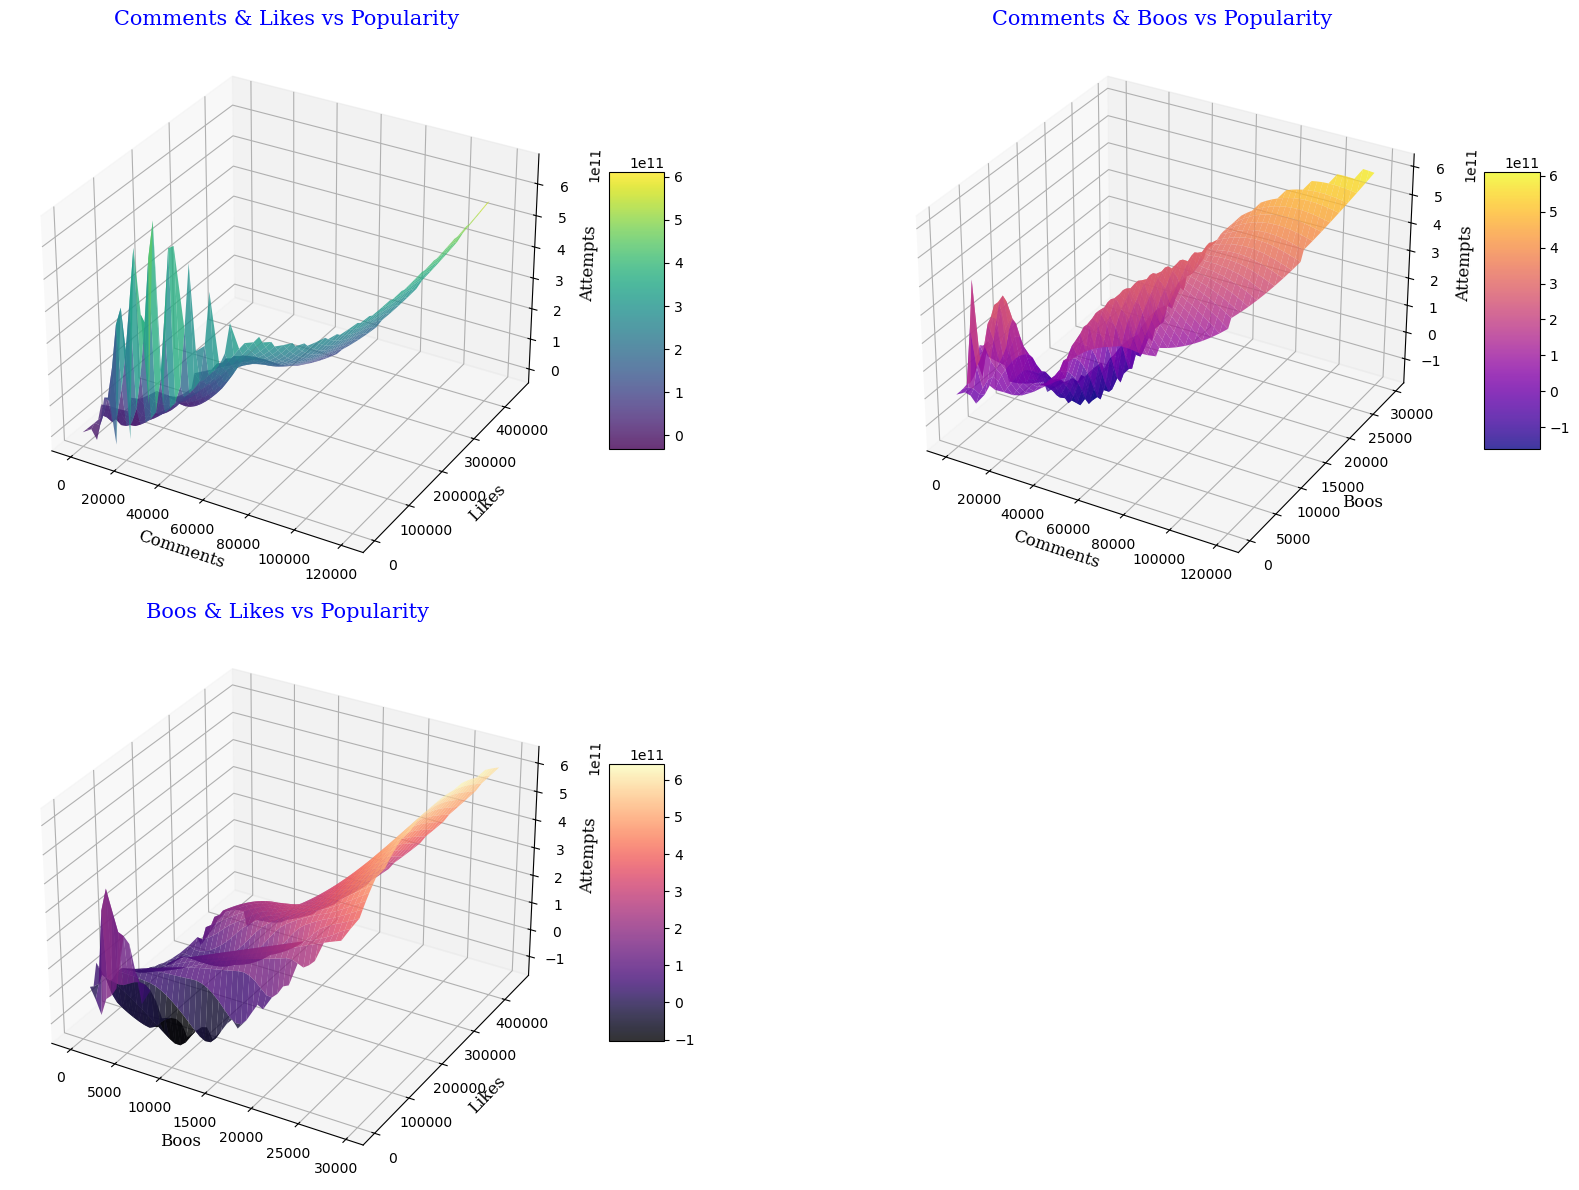

In [4]:
# Set up fonts
font1 = {'family':'serif','color':'black','size':12}
font2 = {'family':'serif','color':'blue','size':15}
font3 = {'family':'serif','color':'black','size':8}
font4 = {'family':'serif','color':'blue','size':12}

# Create grid for surface plots
def create_surface(x, y, z):
    # Create grid coordinates
    xi = np.linspace(min(x), max(x), 50)
    yi = np.linspace(min(y), max(y), 50)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((x, y), z, (xi, yi), method='cubic')
    
    return xi, yi, zi

# Create figure for 3D surface plots
fig = plt.figure(figsize=(18, 12))

# First 3D surface plot: Comments & Likes vs Popularity
ax1 = fig.add_subplot(2, 2, 1, projection="3d")
xi1, yi1, zi1 = create_surface(num_comments, likes, popularity)
surf1 = ax1.plot_surface(xi1, yi1, zi1, cmap='viridis', alpha=0.8)
ax1.set_xlabel("Comments", fontdict=font1)
ax1.set_ylabel("Likes", fontdict=font1)
ax1.set_zlabel("Attempts", fontdict=font1)
ax1.set_title("Comments & Likes vs Popularity", fontdict=font2)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Second 3D surface plot: Comments & Boos vs Popularity
ax2 = fig.add_subplot(2, 2, 2, projection="3d")
xi2, yi2, zi2 = create_surface(num_comments, boos, popularity)
surf2 = ax2.plot_surface(xi2, yi2, zi2, cmap='plasma', alpha=0.8)
ax2.set_xlabel("Comments", fontdict=font1)
ax2.set_ylabel("Boos", fontdict=font1)
ax2.set_zlabel("Attempts", fontdict=font1)
ax2.set_title("Comments & Boos vs Popularity", fontdict=font2)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# Third 3D surface plot: Boos & Likes vs Popularity
ax3 = fig.add_subplot(2, 2, 3, projection="3d")
xi3, yi3, zi3 = create_surface(boos, likes, popularity)
surf3 = ax3.plot_surface(xi3, yi3, zi3, cmap='magma', alpha=0.8)
ax3.set_xlabel("Boos", fontdict=font1)
ax3.set_ylabel("Likes", fontdict=font1)
ax3.set_zlabel("Attempts", fontdict=font1)
ax3.set_title("Boos & Likes vs Popularity", fontdict=font2)
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

Box 1: Background
    
Overall we have chosen to work with this data as we are interested in studying the Mario Maker data as it can provide insights on what types of interactions best help us determine positive player engagement although we may find it interesting to understand overall engagement as there are negative expectations which may be included in more depth later on.
    
This kind of analysis has resembles algortihms within social media, which are largely a complete mystery to the people who use them, though they exert major influence over our lives. The dataset explores the relationship between Super Mario Maker 2 level popularity (measured by likes may include boos in depth later on) and two key engagement metrics: total plays (how often a level was played) and total attempts (how many tries players needed to complete it).

According to <a href="https://www.pewresearch.org/internet/2024/02/22/how-u-s-adults-use-tiktok/">Pew Research</a>, "Some 85% of TikTok users say the content on their “For You” page is at least somewhat interesting, including 40% who call it either extremely or very interesting. Only 14% say it is not too or not at all interesting." Most people using these applications are primarily consuming content served to them by the algorithm, so it would be interesting to gain insight into how a social media algorithm may select content for its users.

<h3>Box 2: Description of Data</h3>

<h4>
The data we are working with compares comments, likes, and boos against # of total attempts played for a given mario maker level. We have plotted it on a log-log scale, because the amount of data points at any given linear scale decreases in density as the magnitude of the point increases. This results in the graph being extremely sparse if it is plotted linearly.

There appears to be a positive relationship between [comments, likes, boos], and total attempts. Boos appear to be the least visually correlated with attempts, and likes appear to be the MOST visually correlated.
</h4>

<h2>Module 3, Assignment 18</h2>

In [5]:
# Prepare the data
predictors = {
    'Likes': likes,
    'Comments': num_comments,
    'Boos': boos
}

# Initialize results storage
results = []

# Perform regression for each predictor
for name, predictor in predictors.items():
    # Calculate basic statistics
    n = len(popularity)
    mean_x = np.mean(predictor)
    mean_y = np.mean(popularity)
    
    # Calculate deviations
    x_dev = predictor - mean_x
    y_dev = popularity - mean_y
    
    # Estimate coefficients
    beta_2 = np.dot(x_dev, y_dev) / np.dot(x_dev, x_dev)
    beta_1 = mean_y - beta_2 * mean_x
    
    # Calculate residuals and variance
    y_pred = beta_1 + beta_2 * predictor
    residuals = popularity - y_pred
    residual_variance = np.sum(residuals**2) / (n - 2)
    
    # Calculate standard errors
    se_beta_2 = np.sqrt(residual_variance / np.dot(x_dev, x_dev))
    se_beta_1 = np.sqrt(residual_variance * (1/n + mean_x**2 / np.dot(x_dev, x_dev)))
    
    # Calculate t-statistics and p-values
    t_beta_1 = beta_1 / se_beta_1
    t_beta_2 = beta_2 / se_beta_2
    df = n - 2
    p_beta_1 = 2 * (1 - t.cdf(abs(t_beta_1), df))
    p_beta_2 = 2 * (1 - t.cdf(abs(t_beta_2), df))
    
    # Store results
    results.append({
        'Predictor': name,
        'Intercept (β₁)': beta_1,
        'Slope (β₂)': beta_2,
        'SE Intercept': se_beta_1,
        'SE Slope': se_beta_2,
        't Intercept': t_beta_1,
        't Slope': t_beta_2,
        'p Intercept': p_beta_1,
        'p Slope': p_beta_2,
        'R²': 1 - np.var(residuals)/np.var(popularity)
    })

# Create a nicely formatted table
results_df = pd.DataFrame(results)
cols = ['Predictor', 'Intercept (β₁)', 'Slope (β₂)', 'SE Intercept', 'SE Slope', 
        't Intercept', 't Slope', 'p Intercept', 'p Slope', 'R²']
results_df = results_df[cols]

# Format the output
def format_scientific(x):
    return "{:.2E}".format(x)

numeric_cols = results_df.columns[1:]
results_df[numeric_cols] = results_df[numeric_cols].applymap(format_scientific)

# Display the results
print("Linear Regression Results for Each Predictor")
print("==========================================")
print(results_df.to_string(index=False))
print("\nNote: All values in scientific notation except Predictor column")

Linear Regression Results for Each Predictor
Predictor Intercept (β₁) Slope (β₂) SE Intercept SE Slope t Intercept  t Slope p Intercept  p Slope       R²
    Likes       8.55E+06   1.07E+06     2.62E+07 6.10E+03    3.26E-01 1.75E+02    7.44E-01 0.00E+00 6.06E-01
 Comments       1.74E+07   4.46E+06     2.14E+07 1.88E+04    8.14E-01 2.37E+02    4.15E-01 0.00E+00 7.37E-01
     Boos      -2.83E+08   1.62E+07     1.97E+07 6.10E+04   -1.44E+01 2.66E+02    0.00E+00 0.00E+00 7.79E-01

Note: All values in scientific notation except Predictor column


/tmp/ipykernel_670/1591282740.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df[numeric_cols] = results_df[numeric_cols].applymap(format_scientific)


<h3>Question 3: what do these parameters mean?</h3>
<h4>
The coefficient beta_1 is the average amount of time, in milliseconds, each line expects a game with zero of the given predictor to be played.

We see that for likes and comments, average playtime for 0 likes/comments is a hugely positive number, whereas it is hugely negative for boos. This suggests that a linear fit does not properly model our mario maker level data, because if it did then we would expect strictly positive values for beta_1. The t-statistics tell us how many standard deviations each parameter is from zero, based on our estimate of built-in model variance. The fact that all of our beta_2 values are on the order of 100-300 means there is an undeniable correlation between all 3 variables and time played, so much so that the p values are literally zero because they are beyond 64 bit floating point precision.

The fact that our p values beta_1 are close to 0 means that the model has very little confidence in the expected baseline of time played vs interactions, which seems reasonable because most of our data points have a small number of interactions so there can be a level with 50 attempts but maybe 2 comments, or an extremely infurating level with a LOT of comments and boos, but very little likes, and the great amount of these cases makes beta_1 extremely uncertain.

The only predictor which had a very strong p value for beta_1 was boos, and boos also had a very high p-value for predicting beta_2. This means, based on this simple linear regression, boos have by far the most precision in predicting time played.
</h4>

<h3>Question 4: Predict 20 points</h3>

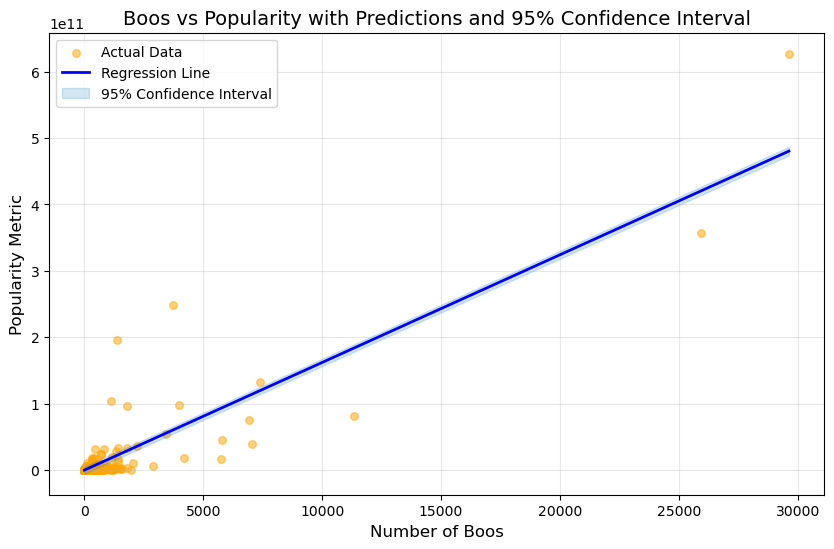


Prediction Table for Boos vs Popularity
--------------------------------------
Boos      Prediction     Lower 95% CI   Upper 95% CI   
0.00      -283162486.34  -5719454348.14 5153129375.45  
1559.58   25010852057.36 19571479455.58 30450224659.13 
3119.16   50304866601.05 44856026540.08 55753706662.03 
4678.74   75598881144.75 70134220100.01 81063542189.49 
6238.32   100892895688.4595406115095.75 106379676281.15
7797.89   126186910232.15120671787311.87131702033152.43
9357.47   151480924775.85145931332088.65157030517463.05
10917.05  176774939319.55171184862774.75182365015864.34
12476.63  202068953863.24196432508957.62207705398768.87
14036.21  227362968406.94221674414532.15233051522281.74
15595.79  252656982950.64246910735669.72258403230231.56
17155.37  277950997494.34272141638747.00283760356241.68
18714.95  303245012038.04297367298289.33309122725786.75
20274.53  328539026581.73322587894976.48334490158186.99
21834.11  353833041125.43347803613750.54359862468500.32
23393.68  379127055669.1

In [6]:
# First, let's properly calculate the regression parameters for boos
def calculate_regression_params(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Calculate deviations
    x_dev = x - mean_x
    y_dev = y - mean_y
    
    # Estimate coefficients
    beta_2 = np.dot(x_dev, y_dev) / np.dot(x_dev, x_dev)
    beta_1 = mean_y - beta_2 * mean_x
    
    # Calculate residuals and variance
    y_pred = beta_1 + beta_2 * x
    residuals = y - y_pred
    residual_variance = np.sum(residuals**2) / (n - 2)
    
    # Calculate standard errors
    se_beta_2 = np.sqrt(residual_variance / np.dot(x_dev, x_dev))
    se_beta_1 = np.sqrt(residual_variance * (1/n + mean_x**2 / np.dot(x_dev, x_dev)))
    
    return beta_1, beta_2, se_beta_1, se_beta_2, n

# Calculate parameters for boos
beta_1, beta_2, se_beta_1, se_beta_2, n = calculate_regression_params(boos, popularity)
df = n - 2  # degrees of freedom

# Create 20 evenly spaced predictor values across the range of boos
boos_range = np.linspace(min(boos), max(boos), 20)

# Calculate predictions
predictions = beta_1 + beta_2 * boos_range

# Calculate standard error for predictions and confidence intervals
s_err = np.sqrt(np.sum((popularity - (beta_1 + beta_2 * boos))**2) / df)  # residual standard error

# Confidence interval calculation
t_val = t.ppf(0.975, df)  # 95% confidence t-value

ci = []
for x in boos_range:
    # Standard error of the prediction at x
    x_dev = x - np.mean(boos)
    se_pred = s_err * np.sqrt(1 + 1/n + (x_dev**2)/np.sum((boos - np.mean(boos))**2))
    ci.append(se_pred * t_val)

lower_bound = predictions - ci
upper_bound = predictions + ci

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the raw data
plt.scatter(boos, popularity, color='orange', alpha=0.5, s=30, label='Actual Data')

# Plot the regression line
plt.plot(boos_range, predictions, color='blue', linewidth=2, label='Regression Line')

# Plot the confidence interval
plt.fill_between(boos_range, lower_bound, upper_bound, color='#2187bb', alpha=0.2, label='95% Confidence Interval')

# Add labels and legend
plt.xlabel('Number of Boos', fontsize=12)
plt.ylabel('Popularity Metric', fontsize=12)
plt.title('Boos vs Popularity with Predictions and 95% Confidence Interval', fontsize=14)
plt.legend(fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()

# Print the prediction table
print("\nPrediction Table for Boos vs Popularity")
print("--------------------------------------")
print(f"{'Boos':<10}{'Prediction':<15}{'Lower 95% CI':<15}{'Upper 95% CI':<15}")
for boo, pred, lb, ub in zip(boos_range, predictions, lower_bound, upper_bound):
    print(f"{boo:<10.2f}{pred:<15.2f}{lb:<15.2f}{ub:<15.2f}")

In [7]:
# Prepare the data matrix
n = len(popularity)
A = np.column_stack([np.ones(n), boos, likes, num_comments])  # Design matrix with intercept

# Calculate coefficients using least squares
beta_estimate = np.linalg.inv(A.T @ A) @ (A.T @ popularity)

# Calculate predictions and residuals
predicted_popularity = A @ beta_estimate
residuals = popularity - predicted_popularity

# Calculate standard errors and statistics
degrees_freedom = n - 4  # 4 parameters (intercept + 3 predictors)
residual_variance = np.sum(residuals**2) / degrees_freedom
cov_matrix = np.linalg.inv(A.T @ A) * residual_variance
stdev_beta = np.sqrt(np.diag(cov_matrix))
t_statistics = beta_estimate / stdev_beta

# Calculate p-values (two-tailed)
def p_value(t_stat, df):
    return 2 * (1 - t.cdf(np.abs(t_stat), df))

p_values = [p_value(t_stat, degrees_freedom) for t_stat in t_statistics]

# Calculate R-squared and RSE
total_variance = np.var(popularity)
r_squared = 1 - (np.var(residuals) / total_variance)
rse = np.sqrt(residual_variance)

# Create a results table
results = pd.DataFrame({
    'Parameter': ['Intercept', 'Boos', 'Likes', 'Comments'],
    'Estimate': beta_estimate,
    'Std Error': stdev_beta,
    't-statistic': t_statistics,
    'p-value': p_values
})

# Format the output
def format_scientific(x):
    return "{:.4e}".format(x) if abs(x) < 0.001 or abs(x) >= 10000 else "{:.4f}".format(x)

# Apply formatting to numeric columns
numeric_cols = ['Estimate', 'Std Error', 't-statistic', 'p-value']
results[numeric_cols] = results[numeric_cols].applymap(format_scientific)

# Display results
print("Multiple Linear Regression Results")
print("=================================")
print(results.to_string(index=False))
print("\nModel Statistics:")
print(f"Residual Standard Error (RSE): {rse:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Degrees of Freedom: {degrees_freedom}")
print(f"Number of Observations: {n}")

Multiple Linear Regression Results
Parameter    Estimate  Std Error t-statistic    p-value
Intercept -1.6279e+08 1.9276e+07     -8.4450 0.0000e+00
     Boos  1.0098e+07 1.7669e+05     57.1527 0.0000e+00
    Likes -3.8469e+05 1.6414e+04    -23.4362 0.0000e+00
 Comments  3.1882e+06 8.9470e+04     35.6342 0.0000e+00

Model Statistics:
Residual Standard Error (RSE): 2678138561.8182
R-squared: 0.7943
Degrees of Freedom: 19997
Number of Observations: 20001


/tmp/ipykernel_670/877116931.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results[numeric_cols] = results[numeric_cols].applymap(format_scientific)


<h3>Question 6: What do the numbers mean?</h3>
<h4>
All of our p values are 0 in machine precision, which basically just means our data set is so large and the correlations are so not random that we can statistically guarantee that each of the variables has SOME correlational value.

The parameters are beta = [-1.62788275e+08  1.00980536e+07 -3.84686944e+05  3.18818909e+06]

This means there is a positive relationship between boos and popularity, negative between likes and popularity, and positive between num_comments and popularity

Notably, the boos have the strongest positive relationship with popularity
</h4>

In [8]:
# Set up random number generator
rng = default_rng()

# Select 20 random points from the data
num_samples = 20
indices = rng.choice(n, size=num_samples, replace=False)
sample_boos = boos[indices]
sample_likes = likes[indices]
sample_comments = num_comments[indices]
sample_popularity = popularity[indices]

# Create design matrix for predictions
A = np.column_stack([np.ones(num_samples), sample_boos, sample_likes, sample_comments])

# Make predictions
predicted_popularity = A @ beta_estimate

# Calculate confidence intervals
residuals = popularity - (np.column_stack([np.ones(n), boos, likes, num_comments]) @ beta_estimate)
RSE = np.sqrt(np.sum(residuals**2) / degrees_freedom)  # Residual standard error

# Calculate standard error for each prediction
X = np.column_stack([np.ones(n), boos, likes, num_comments])  # Full design matrix
X_XtX_inv = A @ np.linalg.inv(X.T @ X)  # Leverage calculation
se_pred = RSE * np.sqrt(1 + np.sum(A * X_XtX_inv, axis=1))  # Prediction standard error

# Get t-value for 95% CI
t_val = t.ppf(0.975, degrees_freedom)

# Calculate confidence bounds
confidence_lower_bound = predicted_popularity - t_val * se_pred
confidence_upper_bound = predicted_popularity + t_val * se_pred

# Create and display results table
results = pd.DataFrame({
    'Boos': sample_boos,
    'Likes': sample_likes,
    'Comments': sample_comments,
    'Predicted': predicted_popularity,
    'Actual': sample_popularity,
    'CI Lower': confidence_lower_bound,
    'CI Upper': confidence_upper_bound
})

# Format the output
pd.options.display.float_format = '{:.4f}'.format
print("\nMultiple Regression Predictions with 95% Confidence Intervals")
print("==========================================================")
print(results.to_string(index=False))


Multiple Regression Predictions with 95% Confidence Intervals
 Boos  Likes  Comments       Predicted        Actual         CI Lower        CI Upper
    6     34         4 -102526553.3184 15694614.0000 -5352033097.7945 5146979991.1578
    4    106        19 -102597284.2081 60690290.4000 -5352105831.6248 5146911263.2086
    6     37        14  -71798723.2510 15607753.6000 -5321306750.6255 5177709304.1234
    3      6         4 -122049479.7340  9033480.0000 -5371557605.0128 5127458645.5449
    4      7         0 -125088869.4186 26606406.0000 -5374595944.4444 5124418205.6072
   69    257        55  610463279.7286 43377430.0000 -4639056135.7714 5859982695.2287
   23     23         8   86124670.9726  7720772.0000 -5163379609.2201 5335628951.1654
   17     24        13   41092607.7579  1105060.2000 -5208412346.8263 5290597562.3421
    4      3         2 -117173743.4607  8357694.6000 -5366681191.4978 5132333704.5765
   14      2         1  -18996709.4053  3892658.0000 -5268501450.1492 5230508

<h3>Question 8: What is the difference?</h3>
<h5>
Linear regression doesn't seem like an amazing model for this data set, because we are predicting negative popularity values, which are actually not physically possible.

It seems like our model works the worst on mario maker levels with limited boos, likes, and comments, because the overwhelmingly negative beta_0 value predicts a negative popularity for these

It appears that the most important predictor for level popularity is boos. Levels with more boos receive more plays, while the other variables have inconsistent relationships with popularity

I am not certain that a linear model is great, but I'm also not sure what OTHER model could be used besides a linear one, as the data looks kind of random/sporadic when plotted, but with a general positive linear trend
</h5>

<h2>Module 3 Assignment 19</h2>

In [9]:
# Prepare the data
classified_popularity = (popularity > np.mean(popularity)).astype(int)
popular_proportion = np.sum(classified_popularity) / n
X = np.column_stack([np.log(boos + 1), 
                    np.log(likes + 1), 
                    np.log(num_comments + 1)])
X = sm.add_constant(X)  # Add intercept term

# Fit logistic regression model
logit_model = sm.Logit(classified_popularity, X)
result = logit_model.fit(method='bfgs')

# Extract and format results
params = result.params
std_err = result.bse
z_stats = result.tvalues  # statsmodels calls them tvalues even for z-stats in logistic regression
p_values = result.pvalues

# Create results table
results_df = pd.DataFrame({
    'Variable': ['Intercept', 'log(Boos+1)', 'log(Likes+1)', 'log(Comments+1)'],
    'Coefficient': params,
    'Std Error': std_err,
    'z-statistic': z_stats,
    'p-value': p_values
})

# Format numeric columns
def format_stats(x):
    if isinstance(x, str):
        return x
    abs_x = abs(x)
    if abs_x < 0.0001 or abs_x >= 10000:
        return f"{x:.2e}"
    return f"{x:.4f}"

# Apply formatting
numeric_cols = ['Coefficient', 'Std Error', 'z-statistic', 'p-value']
results_df[numeric_cols] = results_df[numeric_cols].applymap(format_stats)

# Print model summary
print("\nLogistic Regression Results")
print("==========================")
print(f"Number of 'Popular' cases: {np.sum(classified_popularity)}/{len(classified_popularity)}")
print(f"Baseline accuracy: {np.mean(classified_popularity):.2%}")
print("\nParameter Estimates:")
print(results_df.to_string(index=False))
print("\nModel Diagnostics:")
print(f"Log-Likelihood: {result.llf:.2f}")
print(f"Pseudo R-squared: {result.prsquared:.4f}")
print(f"Convergence: {'Successful' if result.mle_retvals['converged'] else 'Failed'}")

Optimization terminated successfully.
         Current function value: 0.107208
         Iterations: 31
         Function evaluations: 34
         Gradient evaluations: 34

Logistic Regression Results
Number of 'Popular' cases: 785/20001
Baseline accuracy: 3.92%

Parameter Estimates:
       Variable Coefficient Std Error z-statistic  p-value
      Intercept     -7.9013    0.1698    -46.5466 0.00e+00
    log(Boos+1)     -0.3300    0.0566     -5.8329 5.45e-09
   log(Likes+1)      1.0978    0.0768     14.2854 2.70e-46
log(Comments+1)      0.4564    0.0675      6.7562 1.42e-11

Model Diagnostics:
Log-Likelihood: -2144.26
Pseudo R-squared: 0.3524
Convergence: Successful


/tmp/ipykernel_670/1754157807.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df[numeric_cols] = results_df[numeric_cols].applymap(format_stats)


<h3>What do these numbers mean?</h3>
<h5>
The z statistics are all on the order of 30, which means our confidence that each of the independent variables are correlated to the popularity of the game is UNDENIABLE.
Notably, now that we are looking at classifying levels as above or below the ARITHMETIC MEAN of popularity, boos are a NEGATIVE correlation with popularity.
    
Our arithmetic mean provides significantly greater weight to the upper end of games, so this means that the most highly popular games tend to be well liked and not highly booed, whereas the low popularity games actually gain popularity from being booed.
</h5>

In [10]:
# Set up random number generator
rng = default_rng()

# Select 20 random samples
num_samples = 20
indices = rng.choice(n, size=num_samples, replace=False)
sample_data = np.column_stack([
    np.log(boos[indices] + 1),
    np.log(likes[indices] + 1), 
    np.log(num_comments[indices] + 1)
])

# Add intercept term to sample data
sample_data = sm.add_constant(sample_data)

# Make predictions
predicted_probs = result.predict(sample_data)  # Probability estimates
predicted_class = (predicted_probs > 0.5).astype(int)  # Class predictions
actual_class = classified_popularity[indices]

# Calculate prediction metrics
accuracy = np.mean(predicted_class == actual_class)
baseline_accuracy = 1 - popular_proportion

# Create results table
results = pd.DataFrame({
    'Index': indices,
    'Boos': boos[indices],
    'Likes': likes[indices],
    'Comments': num_comments[indices],
    'Probability': predicted_probs,
    'Predicted': predicted_class,
    'Actual': actual_class,
    'Correct': predicted_class == actual_class
})

# Format the output
pd.options.display.float_format = '{:.4f}'.format
print("\nLogistic Regression Predictions")
print("=============================")
print(f"Model Accuracy: {accuracy:.2%}")
print(f"Baseline Accuracy: {baseline_accuracy:.2%}")
print(f"Improvement over Baseline: {(accuracy - baseline_accuracy):.2%} points\n")

# Display first 10 samples (can adjust as needed)
print(results.head(10).to_string(index=False))

# Display overall prediction performance
print("\nPrediction Performance Summary:")
print(f"True Positives: {sum((predicted_class == 1) & (actual_class == 1))}")
print(f"True Negatives: {sum((predicted_class == 0) & (actual_class == 0))}")
print(f"False Positives: {sum((predicted_class == 1) & (actual_class == 0))}")
print(f"False Negatives: {sum((predicted_class == 0) & (actual_class == 1))}")


Logistic Regression Predictions
Model Accuracy: 95.00%
Baseline Accuracy: 96.08%
Improvement over Baseline: -1.08% points

 Index  Boos  Likes  Comments  Probability  Predicted  Actual  Correct
 17818     2      8         0       0.0029          0       0     True
  8575     3      3         0       0.0011          0       0     True
  3560     7      0         2       0.0003          0       0     True
 15717     3      7         2       0.0038          0       0     True
  2910    13      1         2       0.0005          0       0     True
 13617    27    126        26       0.1017          0       1    False
  8323    16     86        21       0.0743          0       0     True
 13678    10     10         2       0.0038          0       0     True
 12927    10     36         8       0.0235          0       0     True
 17175    37     82        15       0.0481          0       0     True

Prediction Performance Summary:
True Positives: 0
True Negatives: 19
False Positives: 0
False 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch 
import torch.nn as nn
import torch.optim as optim

#set print width to infinity
pd.set_option('display.width', 10000)



In [12]:
mario_data = pd.read_json('mario_file.json')


weight = .8
mario_data['engagement'] = mario_data['attempts']*(weight*mario_data['upload_time']+(1-weight)*mario_data['world_record'])

#drop columns used to construct engagement
mario_data = mario_data.drop(columns=['attempts', 'upload_time', 'world_record'])

#print range of each column
for col in mario_data.columns:
    print(f"{col}: {mario_data[col].min()}, {mario_data[col].max()}")

#log all columns
for col in mario_data.columns:
    mario_data[col] = np.log(mario_data[col]+1)
print()

#print range of each column
for col in mario_data.columns:
    print(f"{col}: {mario_data[col].min()}, {mario_data[col].max()}")

print()
print(mario_data.head())
print(mario_data.columns)

mario_data.dtypes


num_comments: 0, 120515
clears: 0, 1094911
plays: 5, 1701547
likes: 0, 446275
boos: 0, 29632
engagement: 66984.0, 888443714191.0

num_comments: 0.0, 11.69953780318134
clears: 0.0, 13.90618455270647
plays: 1.791759469228055, 14.347048982927777
likes: 0.0, 13.008692873684067
boos: 0.0, 10.296643884176694
engagement: 11.112223992711085, 27.51273713328517

   num_comments  clears  plays  likes   boos  engagement
0        4.1109  7.4067 7.4413 5.0304 4.7791     20.0213
1        0.0000  2.9444 4.1589 1.6094 1.9459     15.4078
2        4.3175  6.2066 6.7081 4.8828 4.8203     18.0952
3        4.1109  7.7346 7.7786 5.6870 3.3322     19.0342
4        3.2189  4.6444 5.9839 3.7136 3.8286     18.6983
Index(['num_comments', 'clears', 'plays', 'likes', 'boos', 'engagement'], dtype='object')


num_comments    float64
clears          float64
plays           float64
likes           float64
boos            float64
engagement      float64
dtype: object

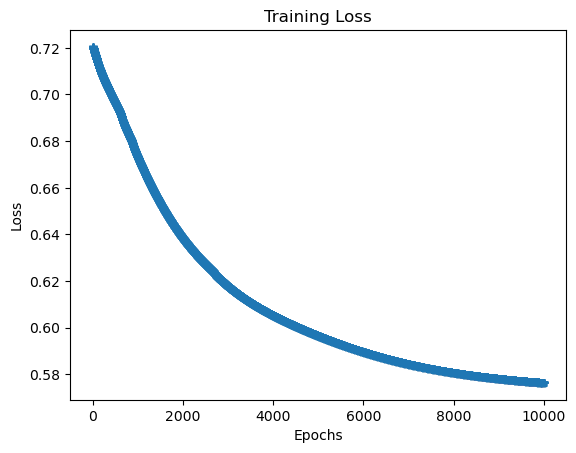

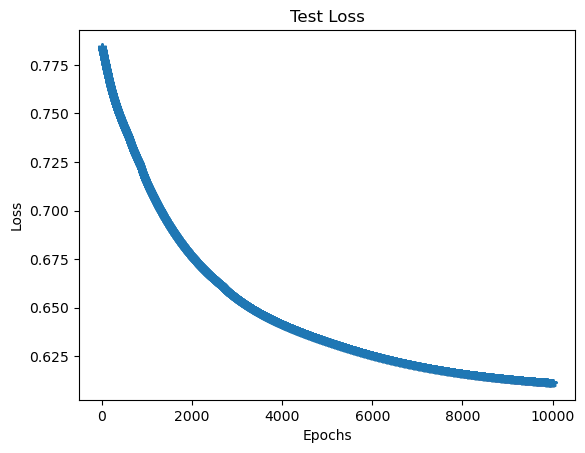

Prediction on Training Data
      num_comments  clears  plays  likes   boos  engagement  sales pred
0           4.1109  7.4067 7.4413 5.0304 4.7791           1      1.0000
1           0.0000  2.9444 4.1589 1.6094 1.9459           0      0.0000
2           4.3175  6.2066 6.7081 4.8828 4.8203           1      1.0000
3           4.1109  7.7346 7.7786 5.6870 3.3322           1      1.0000
4           3.2189  4.6444 5.9839 3.7136 3.8286           1      1.0000
...            ...     ...    ...    ...    ...         ...         ...
9995        1.3863  4.6913 4.9345 2.3979 2.6391           0      0.0000
9996        1.7918  3.9120 4.6821 3.2958 3.4340           0      1.0000
9997        2.9957  6.5103 6.5737 4.1109 2.0794           1      1.0000
9998        1.3863  2.3979 4.1589 1.6094 2.3979           0      0.0000
9999        1.0986  4.4427 4.9767 2.7081 1.3863           1      0.0000

[10000 rows x 7 columns]
Training Error: 1901.0 0.1901
Testing Error: 1977.0 0.1977


In [13]:
#Module 3 Assignment 19 
#Neural Nets

#Define the model network 
class MarioNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MarioNet, self).__init__()
        # Fully connected layer 1: input_size -> hidden_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        # ReLU activation function
        self.relu = nn.ReLU()
        # Fully connected layer 2: hidden_size -> output_size 
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass input through layer 1
        out = self.fc1(x)
        # Apply ReLU activation
        out = self.relu(out)
        # Pass through layer 2 to get to output  
        out = self.fc2(out)
        # Apply sigmoid activation to get probabilities
        out = self.sigmoid(out)
        return out

mario_median = mario_data['engagement'].median()
mario_data['engagement'] = np.where(mario_data['engagement'] > mario_median, 1, 0)

train_n = int(0.5 * len(mario_data))

train_data = mario_data.iloc[:train_n]
test_data = mario_data.iloc[train_n:]

#split data into train, test input and output
train_input = train_data[train_data.columns[:-1].values].to_numpy()
train_output = train_data[train_data.columns[-1]].to_numpy()
test_input = test_data[test_data.columns[:-1].values].to_numpy()
test_output = test_data[test_data.columns[-1]].to_numpy()

#convert to torch tensors
train_inputs_tensor = torch.tensor(train_input, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_output, dtype=torch.float32).view(-1, 1)
test_inputs_tensor = torch.tensor(test_input, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_output, dtype=torch.float32).view(-1, 1)

#parameters for my dataset
input_size = 5 # tv, radio, and newspaper 
hidden_size = 16 # number of units in my hidden layer 
output_size = 1 #sales (I only have one output)  
#these parameters have to do with the iterative process of slow learning that i mentioned in class 
#to understand this better see the slides from Erica Rutter 
learning_rate = 0.0001 #eta in ER slides 
num_epochs = 10000 #how many times are we going to go through the full data set to train 
batch_size = train_n #how many data points in each batch - we are going to only have 1 batch 

# Create an instance of the network
model = MarioNet(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
loss_vector = np.empty(num_epochs, dtype=object)
test_loss = np.empty(num_epochs, dtype=object)

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_inputs_tensor)
    loss = criterion(outputs,train_labels_tensor)

    # Backward and optimize
    optimizer.zero_grad() # Clear gradients from the previous step
    loss.backward() # Compute gradients
    optimizer.step() # Update weights

    loss_vector[epoch] = loss.item()
    #print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    loss_test = criterion(model(test_inputs_tensor), test_labels_tensor)
    test_loss[epoch] = loss_test.item()

fig, (ax4) = plt.subplots(1, 1)
plt.plot(loss_vector,'*') 
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(test_loss,'*')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Make predictions first on training data (remember to apply sigmoid)
with torch.no_grad():
    predicted = model(train_inputs_tensor)
    predicted_classes = (predicted > 0.5).float()
    popularity_pred = predicted_classes.squeeze().numpy() 
    
    #making a table 
    train_pred = train_data.copy()
    train_pred['sales pred'] = popularity_pred
    print('Prediction on Training Data')
    print(train_pred)

    #plotting the predicted versus actual for the training data 
    #fig, (ax5) = plt.subplots(1, 1)
    #plt.plot(salestrain,'k*')
    #plt.plot(sales_clas_pred,'r+')

    #Classification Error 
    train_error = np.sum(np.absolute(train_output - popularity_pred))
    train_error_prop = train_error/train_n
    print('Training Error:',train_error,train_error_prop)

# Make predictions on test data (remember to apply sigmoid)
with torch.no_grad():
    predicted = model(test_inputs_tensor)
    predicted_classes = (predicted > 0.5).float()
    popularity_pred = predicted_classes.squeeze().numpy()
    #making a table 
    #test_pred = pandas.DataFrame({'tv':tvtest,'radio':radiotest,'newspaper':newspapertest,'sales':salestest,'sales pred':sales_clas_pred})
    #pandas.set_option('display.max_rows', None) 
    #print(test_pred)

    #plotting the predicted versus actual for the training data 
    #fig, (ax6) = plt.subplots(1, 1)
    #plt.plot(salestest,'k*')
    #plt.plot(sales_clas_pred,'r+')

    #Classification Error 
    test_error = np.sum(np.absolute(test_output - popularity_pred))
    test_error_prop = test_error/train_n
    print('Testing Error:',test_error,test_error_prop)
    
#Reference: ISLP Chapter 10
#Reference to Python torch library being used: https://pytorch.org/tutorials/beginner/basics/intro.html
#Googled and used Google AI overview: simple neural network using pytorch 
#Googled and used Google AI overview: simple neural network using pytorch and bcewithlogitsloss
#What loss function to use: https://discuss.pytorch.org/t/bce-loss-vs-cross-entropy/97437/5 and https://sebastianraschka.com/blog/2022/losses-learned-part1.html
#Slides from Erica Rutter: IntroMLCNNRNN_2024 start at slide 10 